In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [39]:
# # load pickled data
# with open('CCLE_rank.pkl', 'rb') as f:
#     ccle_rank = pickle.load(f)
# with open('parkinsons_rank.pkl', 'rb') as f:
#     parkinsons_rank = pickle.load(f)
# with open('performance_rank.pkl', 'rb') as f:
#     performance_rank = pickle.load(f)
# with open('temperature_rank.pkl', 'rb') as f:
#     temperature_rank = pickle.load(f)

# dictionaries = [ccle_rank, parkinsons_rank, performance_rank, temperature_rank]

# average_dict = {key: sum(d[key] for d in dictionaries) / len(dictionaries) for key in ccle_rank.keys()}

# sorted_keys = sorted(average_dict, key=average_dict.get)

# # Display sorted keys and their corresponding values
# sorted_average_dict = {key: average_dict[key] for key in sorted_keys}

# for k,v in sorted_average_dict.items():
#     print(k, v)

In [40]:
task = "regression" #"classification" #"regression"
data = "temperature"
ablation_directory =f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_{data}/{data}_selection/varying_sample_row_n"
#####Regression
#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_CCLE_PD_0325901_retrain/CCLE_PD_0325901_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_parkinsons_retrain/parkinsons_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_performance_retrain/performance_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_temperature_retrain/temperature_retrain/varying_sample_row_n"

#####Classification
#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_juvenile_retrain/juvenile_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_csi_pecarn_retrain/csi_pecarn_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_credit_g_retrain/credit_g_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_Ionosphere_retrain/Ionosphere_retrain/varying_sample_row_n"
combined_df = pd.DataFrame()
split_seeds = [1,2,3]
rf_seeds = [1,2,3]
for split_seed in split_seeds:
    for rf_seed in rf_seeds:
        df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}rf_seed_{rf_seed}/results.csv"))
        combined_df = pd.concat([combined_df, df], ignore_index=True)


# rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/{task_name}'
# combined_df_rf_plus = pd.DataFrame()
# for file in os.listdir(rf_plus_directory):
#     if file.endswith(".csv"):
#         df = pd.read_csv(os.path.join(rf_plus_directory, file))
#         combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [41]:
combined_df.head()

,sample_row_n,sample_row_n_name,rep,n_estimators,min_samples_leaf,max_features,random_state,model,fi,train_size,test_size,num_features,data_split_seed,rf_seed,num_features_masked,num_features_selected_0.01,RF_Regressor_MSE_top_0.01,RF_Regressor_R2_top_0.01,xgboost_Regressor_MSE_top_0.01,xgboost_Regressor_R2_top_0.01,Linear_Regressor_MSE_top_0.01,Linear_Regressor_R2_top_0.01,num_features_selected_0.05,RF_Regressor_MSE_top_0.05,RF_Regressor_R2_top_0.05,xgboost_Regressor_MSE_top_0.05,xgboost_Regressor_R2_top_0.05,Linear_Regressor_MSE_top_0.05,Linear_Regressor_R2_top_0.05,num_features_selected_0.1,RF_Regressor_MSE_top_0.1,RF_Regressor_R2_top_0.1,xgboost_Regressor_MSE_top_0.1,xgboost_Regressor_R2_top_0.1,Linear_Regressor_MSE_top_0.1,Linear_Regressor_R2_top_0.1,num_features_selected_0.15,RF_Regressor_MSE_top_0.15,RF_Regressor_R2_top_0.15,xgboost_Regressor_MSE_top_0.15,xgboost_Regressor_R2_top_0.15,Linear_Regressor_MSE_top_0.15,Linear_Regressor_R2_top_0.15,num_features_selected_0.25,RF_Regressor_MSE_top_0.25,RF_Regressor_R2_top_0.25,xgboost_Regressor_MSE_top_0.25,xgboost_Regressor_R2_top_0.25,Linear_Regressor_MSE_top_0.25,Linear_Regressor_R2_top_0.25,num_features_selected_0.4,RF_Regressor_MSE_top_0.4,RF_Regressor_R2_top_0.4,xgboost_Regressor_MSE_top_0.4,xgboost_Regressor_R2_top_0.4,Linear_Regressor_MSE_top_0.4,Linear_Regressor_R2_top_0.4,num_features_selected_0.5,RF_Regressor_MSE_top_0.5,RF_Regressor_R2_top_0.5,xgboost_Regressor_MSE_top_0.5,xgboost_Regressor_R2_top_0.5,Linear_Regressor_MSE_top_0.5,Linear_Regressor_R2_top_0.5,num_features_selected_0.7,RF_Regressor_MSE_top_0.7,RF_Regressor_R2_top_0.7,xgboost_Regressor_MSE_top_0.7,xgboost_Regressor_R2_top_0.7,Linear_Regressor_MSE_top_0.7,Linear_Regressor_R2_top_0.7,num_features_selected_0.9,RF_Regressor_MSE_top_0.9,RF_Regressor_R2_top_0.9,xgboost_Regressor_MSE_top_0.9,xgboost_Regressor_R2_top_0.9,Linear_Regressor_MSE_top_0.9,Linear_Regressor_R2_top_0.9,split_seed
0,NaN,keep_all_rows,0,100,5,0.33,42,RF,LIME_RF,683,337,46,1,1,46,1,0.065978,0.585859,0.072439,0.545307,0.080756,0.493104,3,0.057773,0.637365,0.076940,0.517053,0.071752,0.549618,5,0.076612,0.519111,0.076541,0.519556,0.073049,0.541476,7,0.059147,0.628740,0.078514,0.507174,0.073312,0.539826,12,0.056943,0.642573,0.074509,0.532312,0.073591,0.538075,19,0.057882,0.636680,0.065696,0.587632,0.071619,0.550452,23,0.055339,0.652642,0.070448,0.557807,0.071155,0.553366,33,0.055727,0.650208,0.071286,0.552543,0.068061,0.572788,42,0.055735,0.650156,0.071938,0.548452,0.067633,0.575476,1
1,NaN,keep_all_rows,0,100,5,0.33,42,RF,Local_MDI+_Alo_fit_on_all_ranking_RFPlus,683,337,46,1,1,46,1,0.058014,0.635849,0.072430,0.545360,0.072183,0.546910,3,0.057286,0.640420,0.077314,0.514705,0.071752,0.549618,5,0.057012,0.642142,0.073156,0.540804,0.070452,0.557777,7,0.054621,0.657146,0.070341,0.558475,0.068496,0.570054,12,0.055300,0.652884,0.069182,0.565753,0.067906,0.573758,19,0.055341,0.652632,0.066374,0.583378,0.066592,0.582008,23,0.054910,0.655337,0.066411,0.583143,0.067015,0.579353,33,0.054526,0.657746,0.071399,0.551837,0.066362,0.583450,42,0.054463,0.658142,0.071095,0.553744,0.067234,0.577975,1
2,NaN,keep_all_rows,0,100,5,0.33,42,RF,Local_MDI+_MDI_fit_on_all_ranking_RFPlus,683,337,46,1,1,46,1,0.058014,0.635849,0.072430,0.545360,0.072183,0.546910,3,0.057286,0.640420,0.077314,0.514705,0.071752,0.549618,5,0.057012,0.642142,0.073156,0.540804,0.070452,0.557777,7,0.054621,0.657146,0.070341,0.558475,0.068496,0.570054,12,0.055300,0.652884,0.069182,0.565753,0.067906,0.573758,19,0.055341,0.652632,0.066374,0.583378,0.066592,0.582008,23,0.054910,0.655337,0.066411,0.583143,0.067015,0.579353,33,0.054526,0.657746,0.071399,0.551837,0.066362,0.583450,42,0.054463,0.658142,0.071095,0.553744,0.067234,0.577975,1
3,NaN,keep_all_rows,0,100,5,0.33,42,RF,Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus,683,337,46,1,1,46,1,0.058014,0.635849,0.072430,0.545360,0.072183,0.546910,3,0.058470,0.632986,0.076902,0.517291,0.070800,0.555597,5,0.056830,0.643286,0.071647,0.550279,0.070637,0.5566

In [42]:
# df = pd.DataFrame(combined_df_rf_plus)
# averages = df.groupby('Model').mean().reset_index()
# pd.DataFrame(averages)

In [43]:
combined_df["num_features"].unique()

array([46])

### Summarise the Ablation Data

In [44]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")

The training size is 683 and the test size is 337


### Plot the Ablation Data Performance

In [45]:
num_features = combined_df['num_features_masked'].drop_duplicates().values[0]
metrics = {"regression": ["MSE", "R2"], "classification": ["AUROC", "LogLoss"]} #MSE
ablation_models = {"regression": ["RF_Regressor", "xgboost_Regressor", "Linear_Regressor"],
                   "classification": ["RF_Classifier", "Logistic_Regression"]}

In [46]:
methods = [
        # 'Random',
        # 'LIME_RF', 
       'Local_MDI+_Alo_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus',
    #    'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus',
    #    'TreeSHAP_RF'
       ]
color_map = {
    'Random': 'gray',  # Assign a default neutral color for Random
    'LIME_RF': '#71BEB7',
    'Local_MDI+_Alo_fit_on_all_ranking_RFPlus': '#FF5733',  # Example bright color
    'Local_MDI+_MDI_fit_on_all_ranking_RFPlus': '#33FF57',  # Example greenish color
    'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus': '#3357FF',  # Example blueish color
    'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus': '#FF33A1',  # Example pinkish color
    'TreeSHAP_RF': 'orange'
}

In [47]:
if num_features > 20:
    all_ratios = [0.01, 0.05, 0.1, 0.15, 0.25, 0.4, 0.5, 0.7, 0.9]
else:
    all_ratios = [0.05, 0.1, 0.15, 0.25, 0.4, 0.5, 0.7, 0.9]
num_features_selected = []
for r in all_ratios:
    num_features_selected.append(combined_df[f"num_features_selected_{r}"].unique()[0])

#### Summary of results

In [48]:
# results = {}
# for a_model in ["RF_Regressor"]:
#     for metric in ["MSE"]:
#         for m in methods:
#             results[m] = []
#         for m in methods:
#             for k in all_ratios:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model + f"_{metric}_top_{k}"].mean())

# filtered_sums = {
#     key: sum(values[:5]) 
#     for key, values in results.items()
# }
# sorted(filtered_sums, key=filtered_sums.get)

# import pickle

# list_dict = {element: index + 1 for index, element in enumerate(sorted(filtered_sums, key=filtered_sums.get))}

# with open("temperature_rank.pkl", "wb") as file:
#     pickle.dump(list_dict, file)

# print("Dictionary saved as pickle file:", list_dict)

In [49]:
# method_names = {'TreeSHAP_RF': 'SHAP', 'Local_MDI+_fit_on_all_ranking_RFPlus': "LMDI+", 'LIME_RF': 'LIME'}

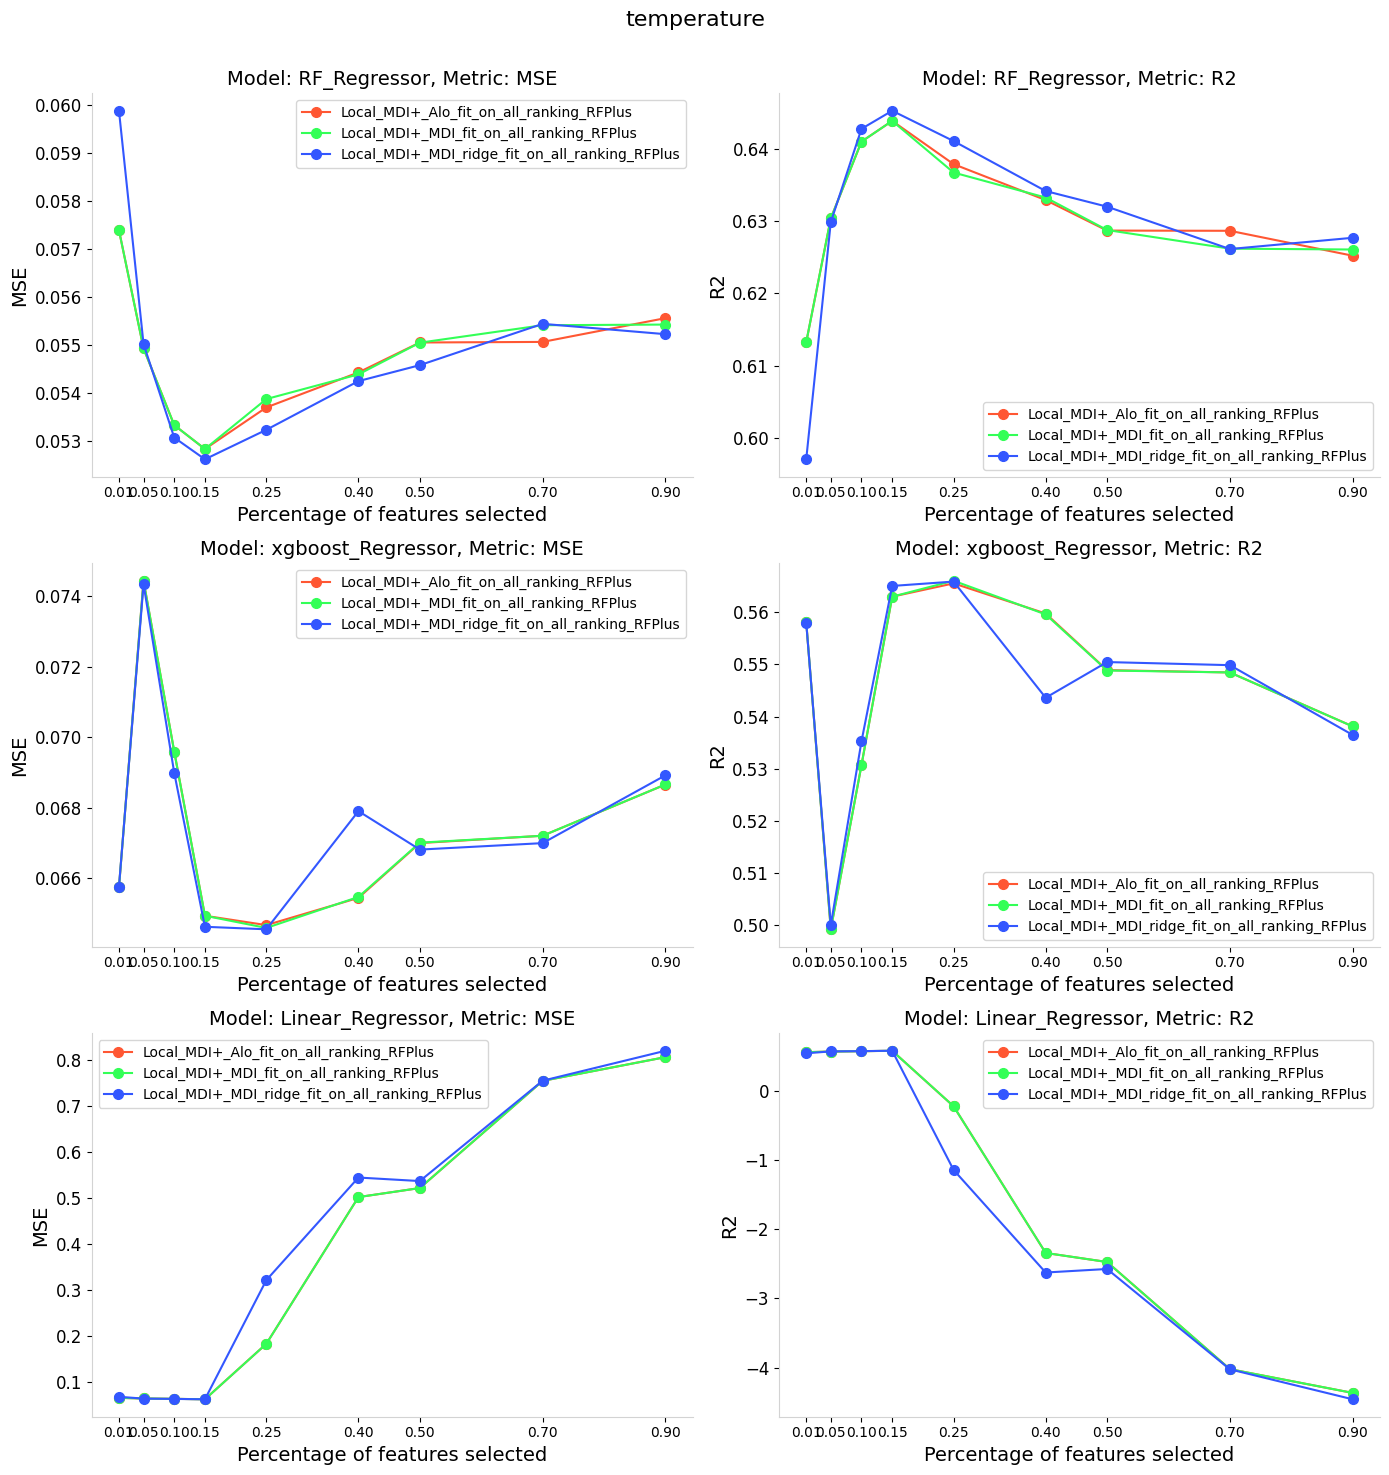

In [50]:
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Determine the number of rows and columns for subplots
n_models = len(ablation_models[task])
n_metrics = len(metrics[task])

# Create subplots with a grid of n_models rows and n_metrics columns
fig, axs = plt.subplots(
    nrows=n_models,
    ncols=n_metrics,
    figsize=(7 * n_metrics, 5 * n_models)  # Adjust figure size dynamically
)

# Ensure axs is iterable, even if there's only one subplot
if n_models == 1 and n_metrics == 1:
    axs = [[axs]]  # Single subplot case
elif n_models == 1 or n_metrics == 1:
    axs = [axs]  # Single row or column

# Iterate through models and metrics
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        ax = axs[i][j] if n_models > 1 and n_metrics > 1 else axs[max(i, j)]
        
        results = {m: [] for m in methods}
        for m in methods:
            for k in all_ratios:
                results[m].append(
                    combined_df[combined_df['fi'] == m][f"{a_model}_{metric}_top_{k}"].mean()
                )

        for m in methods:
            color = color_map[m]
            ax.plot(
                all_ratios, results[m],
                label=m, linestyle='solid',
                color=color, marker='o', markersize=marker_size
            )

        # Set labels, title, and ticks for each subplot
        ax.set_xticks(all_ratios)
        ax.set_xlabel('Percentage of features selected', fontsize=14)
        ax.set_ylabel(metric, fontsize=14)
        ax.set_title(f"Model: {a_model}, Metric: {metric}", fontsize=14)
        ax.legend(fontsize=10, title_fontsize=12)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
fig.suptitle(data, fontsize=16)  # Add the global title
plt.show()

In [51]:
# # Set global parameters for plots
# plt.rcParams['axes.labelsize'] = 30
# plt.rcParams['xtick.labelsize'] = 10
# plt.rcParams['ytick.labelsize'] = 12

# # Remove chartjunk: Remove right and top spines, and change edge color to light grey
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 'lightgrey'

# # Define marker size
# marker_size = 7

# # Create a single-column subplot
# fig, axs = plt.subplots(len(ablation_models[task]), 1, figsize=(7, 5))

# # Ensure axs is always iterable
# if len(ablation_models[task]) == 1:
#     axs = [axs]

# # Iterate through models
# for i, a_model in enumerate(ablation_models[task]):
#     results = {m: [] for m in methods}
#     for m in methods:
#         for k in all_ratios:
#             results[m].append(combined_df[combined_df['fi'] == m][a_model + f"_{metrics[task][0]}_top_{k}"].mean())

#     ax = axs[i]
#     for m in methods:
#         color = color_map[m]
#         ax.plot(all_ratios, results[m], label=m, linestyle='solid', color=color, marker='o', markersize=marker_size)

#     # Set labels and title for the subplot
#     ax.set_xticks(all_ratios)
#     ax.set_xlabel('Percentage of features selected', fontsize=14)
#     ax.set_ylabel(f"{metrics[task][0]}", fontsize=14)
#     ax.legend(fontsize=10, title_fontsize=12)

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
# fig.suptitle(f"CCLE Dataset", fontsize=16)  # Add the global title
# plt.savefig("ccle_retrain.png")
# plt.show()

In [52]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 5))

# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods:
#             results[m] = []
#         for m in methods:
#             for k in all_ratios:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model + f"_{metric}_top_{k}"].mean())

#         # excluded_keys = {'LIME_RF', 'TreeSHAP_RF'}
#         # filtered_sums = {
#         #     key: sum(values[:5]) 
#         #     for key, values in results.items() if key not in excluded_keys
#         # }
#         # if metric == "MSE" or metric == "LogLoss":
#         #     top_3_keys = sorted(filtered_sums, key=filtered_sums.get)[:3]
#         # else:
#         #     top_3_keys =sorted(filtered_sums, key=filtered_sums.get, reverse=True)[:3]
#         # top_3_keys.extend(['LIME_RF', 'TreeSHAP_RF'])

#         ax = axs[j]#, j]
#         for m in methods:#top_3_keys:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "LIME_RF", "Random"]:
#                 ax.plot(num_features_selected, results[m], label=m, linestyle='dashed', color=color, marker='o')
#             else:
#                 ax.plot(num_features_selected, results[m], label=m, color=color, marker='o')
#         ax.set_xticks(num_features_selected)
#         ax.set(
#             xlabel='Number of features selected',
#             ylabel=f"{metric}",
#             title=f'Ablation model = {a_model}'
#         )
#         ax.legend()

# plt.tight_layout()
# #plt.savefig(f"./Ionosphere.png")
# plt.show()
